# Homework #5: Generalized Linear Models (GLMs)

## Background

In 2014, the analytics website, FiveThirtyEight, published an analysis of the gender disparity in appearances in comic books at the two large studios, Marvel and DC. You're working for a small upstart comic book company and you want to work to understand what characteristics are associated with a reduction in appearances and thereby learn where gaps in representation can be filled by your firm. Using the data collected by FiveThirtyEight from the Marvel and DC wiki pages, you will fit an appropriate GLM to predict the number of appearances given this data.

### Relevant Datasets
* `marvel-wikia-data.csv`
* `dc-wikia-data.csv`


Article: https://fivethirtyeight.com/features/women-in-comic-books/

Aggregated Data: https://github.com/fivethirtyeight/data/tree/master/comic-characters

Data Sources:
* http://dc.wikia.com/wiki/Main_Page
* http://marvel.wikia.com/Main_Page

## Task 1: Concatenate the Marvel and DC datasets into a single dataset.

The function `pd.concat` will be useful for this. You should also create a new column in each dataset before concatenating that represents the studio for each. This will allow us to distinguish between the impact of one studio vs the other.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dfm = pd.read_csv('marvel-wikia-data.csv')
dfm['marvel'] = 1
dfdc = pd.read_csv('dc-wikia-data.csv')
df = pd.concat([dfm, dfdc], axis=0)
df['marvel'] = np.where(df['marvel']==1, 1, 0)

df

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,marvel,YEAR
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,1,NaN
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,1,NaN
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,1,NaN
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,1,NaN
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN,0,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,0,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,0,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,0,NaN


## Task 2: Subset the data to relevant variables and observations.

If you want to limit the number of levels, a good list of variables would be: `ALIGN`,`SEX`,`ALIVE`,`APPEARANCES`,`ID`,`Studio`. Given that this dataset includes a few `SEX` categories with very few observations, create a new binary variable for a character's `SEX` being Male or not Male. Also, remove any characters that only appear once.

In [3]:
df = df.drop(['urlslug','name','page_id','EYE','HAIR','GSM','FIRST APPEARANCE','Year','YEAR'], axis=1)
df.head()

,ID,ALIGN,SEX,ALIVE,APPEARANCES,marvel
0,Secret Identity,Good Characters,Male Characters,Living Characters,4043.0,1
1,Public Identity,Good Characters,Male Characters,Living Characters,3360.0,1
2,Public Identity,Neutral Characters,Male Characters,Living Characters,3061.0,1
3,Public Identity,Good Characters,Male Characters,Living Characters,2961.0,1
4,No Dual Identity,Good Characters,Male Characters,Living Characters,2258.0,1


In [4]:
print(df.shape)
df.dropna(axis=0, inplace=True)
print(df.shape)
df

(23272, 6)
(14338, 6)


,ID,ALIGN,SEX,ALIVE,APPEARANCES,marvel
0,Secret Identity,Good Characters,Male Characters,Living Characters,4043.0,1
1,Public Identity,Good Characters,Male Characters,Living Characters,3360.0,1
2,Public Identity,Neutral Characters,Male Characters,Living Characters,3061.0,1
3,Public Identity,Good Characters,Male Characters,Living Characters,2961.0,1
4,No Dual Identity,Good Characters,Male Characters,Living Characters,2258.0,1
...,...,...,...,...,...,...
6533,Public Identity,Neutral Characters,Male Characters,Living Characters,1.0,0
6536,Public Identity,Good Characters,Male Characters,Deceased Characters,1.0,0
6537,Public Identity,Bad Characters,Male Characters,Living Characters,1.0,0
6539,Public Identity,Good Characters,Male Characters,Living Characters,1.0,0


## Task 3: Split your data into train/test and fit an appropriate GLM to the training data.

It will be up to you to determine the appropriate choice of distribution or family of the GLM. Look at residual plots and see if there are any red flags with this model.

C:\Users\light\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='APPEARANCES'>

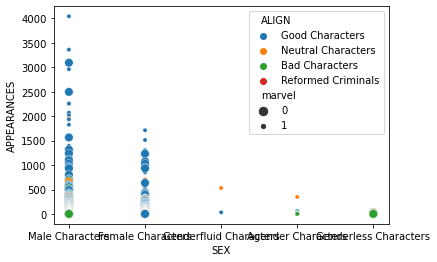

In [5]:
sns.scatterplot(df['SEX'], df['APPEARANCES'], hue=df['ALIGN'], size=df['marvel'])

In [6]:
test = df.sample(frac=.2, axis=0)
train = df.drop(index=test.index)
print(train.shape)
print(test.shape)

(10457, 6)
(2868, 6)


In [7]:
xtrain = train.drop(['APPEARANCES'], axis=1)
ytrain = train['APPEARANCES']
xtrain = pd.get_dummies(data=xtrain, drop_first=True)
xtrain = sm.add_constant(xtrain)
print(xtrain.shape)
print(ytrain.shape)

(10457, 13)
(10457,)


In [8]:
poisson_model = sm.GLM(ytrain, xtrain, family=sm.families.Poisson())
poisson_results = poisson_model.fit()
poisson_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            APPEARANCES   No. Observations:                10457
Model:                            GLM   Df Residuals:                    10444
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.2727e+05
Date:                Thu, 14 Jul 2022   Deviance:                   8.1774e+05
Time:                        14:27:15   Pearson chi2:                 3.95e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0069      0.305      0.023      0.982      -0.590       0.604
marvel                              -0.2727      0.004    -61.367      0.000      -0.281      -0.264
ID_Known to Authorities Identity     3.5533      0.303     11.721      0.000       2.959       4.148
ID_No Dual Identity                  2.5494      0.302      8.452      0.000       1.958       3.141
ID_Public Identity                   2.4453      0.302      8.109      0.000       1.854       3.036
ID_Secret Identity                   2.4492      0.302      8.122      0.000       1.858       3.040
ALIGN_Good Characters                1.3455      0.005    251.979      0.000       1.335       1.356
ALIGN_Neutral Characters             0.8431      0.007    119.429      0.000       0.829       0.857
SEX_Female Characters               -0.3365      0.043     -7.834      0.000      -0.421      -0.252
SEX_Genderfluid Characters           1.9362      0.060     32.286      0.000       1.819       2.054
SEX_Genderless Characters           -0.8157      0.087     -9.403      0.000      -0.986      -0.646
SEX_Male Characters                 -0.2035      0.043     -4.749      0.000      -0.287      -0.119
ALIVE_Living Characters              0.3596      0.005     67.419      0.000       0.349       0.370
====================================================================================================
"""

## Task 4: Interpret coefficients in the context of our original research question of "what characteristics are associated with a reduction in appearances?"

Note: You can ignore any broken assumptions at this point and simply treat it as an effective model.

When the movie is made by Marvel, the character is bad, female, genderless, male, deceased, or has an unknown identity, the number of appearances decreases.